In [1]:
from threeML import *
import numpy as np
from threeML.plugins import *
from skylab.datasets import Datasets
from astropy import units as u

import os, sys, glob, abc

def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"

# Read in all of the data files
data_files = dataset + "/IC86_*exp.npy"
exp = read(glob.glob(data_files))

# Read in all of the MC files 
sim_files = dataset + "/IC86*MC*npy"
mc = read(glob.glob(sim_files))

# Set the angular error floor to 0.2 degrees
#exp['angErr'][exp['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#mc['angErr'][mc['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)

exp['ra']=np.random.uniform(0,2*np.pi,size=len(exp))
grl = np.load("/data/i3store/users/mjlarson/student_data/GRL/IC86_2012_exp.npy")
livetime = np.sum(grl['livetime'])


/data/disk01/home/jasonfan/threeML/threeML/__init__.py:12: UserWarning: No DISPLAY variable set. Using backend for graphics without display (Agg)
  warnings.warn("No DISPLAY variable set. Using backend for graphics without display (Agg)")
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of K to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)

Bad key "text.kerning_factor" on line 4 in
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/matplotlib/mpl-data/st

In [2]:
from imp import reload
reload(IceCubeLike)

import warnings
warnings.filterwarnings("ignore")
#data = np.random.choice(exp, 10000).copy()
#jl._data_list['test'].llh_model.update_data(data)
IceCube=IceCubeLike.IceCubeLike("test",exp,mc,exp,verbose=True)


In [16]:
source1_sp = Powerlaw()
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1_sp.K=1e-13
source1_neutrino = Powerlaw()
source1_neutrino.K=1e-10
source1_neutrino.index=-2
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1 = PointSource("source1", ra=83.63, dec=22.0145, spectral_shape=source1_sp)
source1_nu = IceCubeLike.NeutrinoPointSource("source1_nu",ra=83.63, dec=22.0145,spectral_shape=source1_neutrino)
model = Model(source1,source1_nu)
model.source1.spectrum.main.Powerlaw.K.fix = True
model.source1.spectrum.main.Powerlaw.index.fix = True
model.source1_nu.spectrum.main.Powerlaw.index.fix = True
IceCubedata = DataList(IceCube)
jl = JointLikelihood(model, IceCubedata)

In [17]:
best_fit_parameters, likelihood_values = jl.fit(quiet=True)

(9.259317866790928, -17.630257373999456)
(9.302057613149193, -17.71172137517359)
(9.216773352013972, -17.54916621796149)
(9.26581335162885, -17.642638031852986)
(9.252826908790754, -17.61788536133588)
(3.383422302224735, -6.4377708819882775)
(2.35741270568179, -4.4849703165063755)
(1.468041480736911, -2.792630900992454)
(0.8182612374164095, -1.5564354829776834)
(0.5056339506555362, -0.9617404410423326)
(0.30254539786571244, -0.5754409832952323)
(0.17939282095096815, -0.3411994774737245)
(0.1080329268222768, -0.20547330773235917)
(0.06463128387234962, -0.12292482566910973)
(0.03867231487604221, -0.07355217497535502)
(0.02319337730738668, -0.04411217462204521)
(0.023196256469294588, -0.0441176506030631)
(0.023190498502331906, -0.04410669933261498)
(0.02322218499213707, -0.04416696498328284)
(0.023164605307943377, -0.04405745215599122)
(0.022837377821901622, -0.04343508659349091)
(0.021467117842220745, -0.04082894120266993)
(0.018390036300640553, -0.03497653552649982)
(0.01155936543453356

In [18]:
jl._current_minimum

1.51226916982451e-06

In [33]:
test=np.linspace(0,jl._data_list['test'].llh_model.N,10000)
ts=[]
for i in test:
    ts.append(jl._data_list['test'].llh_model.eval_llh_ns(i)[1])

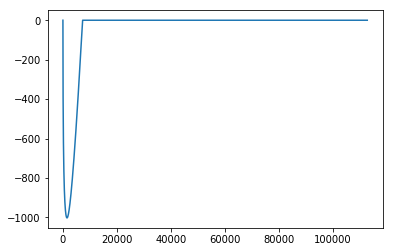

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt, colors
plt.plot(test,np.array(ts)*-1)

In [45]:
from mla.core import LLH_point_source
dec = 22.0145*np.pi/180
ra = 83.63*np.pi/180
b=LLH_point_source(ra,dec,exp,mc,spectrum="PowerLaw",background=exp,background_time_profile=(50000,60000))

In [1]:
best_fit_parameters, likelihood_values = jl.fit()

NameError: name 'jl' is not defined

In [11]:
from imp import reload
reload(IceCubeLike)
IceCube=IceCubeLike.IceCubeLike("test",exp,mc,exp,background_time_profile=(0,1))

source1_sp = Powerlaw()
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1_sp.K=1e-13
source1_neutrino = Powerlaw()
source1_neutrino.K=1e-6

#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1 = PointSource("source1", ra=83.63, dec=22.0145, spectral_shape=source1_sp)
source1_nu = IceCubeLike.NeutrinoPointSource("source1_nu",ra=83.63, dec=22.0145,spectral_shape=source1_neutrino)
model = Model(source1,source1_nu)
model.source1.spectrum.main.Powerlaw.K.fix = True
model.source1.spectrum.main.Powerlaw.index.fix = True
model.source1_nu.spectrum.main.Powerlaw.index.bounds = (-4,-1)
#model.source1_nu.spectrum.main.Powerlaw.K.bounds = (1e-5 * 1 / (u.cm**2 * u.s * u.TeV),10.0 * 1 / (u.cm**2 * u.s * u.TeV))
IceCubedata = DataList(IceCube)
jl = JointLikelihood(model, IceCubedata)
data=np.load("testdata.npy")
data['time']=0.5
jl._data_list['test'].llh_model.update_data(data)


In [18]:
jl._data_list.values()

odict_values([<threeML.plugins.IceCubeLike.IceCubeLike object at 0x7fe4f721cac8>])

In [ ]:
%timeit best_fit_parameters, likelihood_values = jl.fit()

Best fit values:



,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(1.2 -1.0 +6) x 10^-4,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.38 +/- 0.19,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-275.087937
total,-275.087937



Values of statistical measures:



,statistical measures
AIC,-552.175873
BIC,-550.175873


Best fit values:



,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(1.2 -1.0 +6) x 10^-4,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.38 +/- 0.19,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-275.087969
total,-275.087969



Values of statistical measures:



,statistical measures
AIC,-552.175937
BIC,-550.175937


Best fit values:



,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(1.2 -1.0 +6) x 10^-4,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.38 +/- 0.19,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-275.087969
total,-275.087969



Values of statistical measures:



,statistical measures
AIC,-552.175937
BIC,-550.175937


Best fit values:



,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(1.2 -1.0 +6) x 10^-4,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.38 +/- 0.19,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-275.087969
total,-275.087969



Values of statistical measures:



,statistical measures
AIC,-552.175937
BIC,-550.175937


Best fit values:



,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(1.2 -1.0 +6) x 10^-4,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.38 +/- 0.19,



Correlation matrix:



1.00,-1.00
-1.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-275.087969
total,-275.087969



Values of statistical measures:



,statistical measures
AIC,-552.175937
BIC,-550.175937
